In [1]:
from google.colab import files
uploaded = files.upload()

Saving Play_Store_Data.csv to Play_Store_Data.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving User_Reviews.csv to User_Reviews.csv


Datasets loaded successfully.

--- Initial Play Store Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

--- Initial User Reviews Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

<ipython-input-4-add786ee6742>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=play_store_df, order=play_store_df['Category'].value_counts().index, palette='viridis')


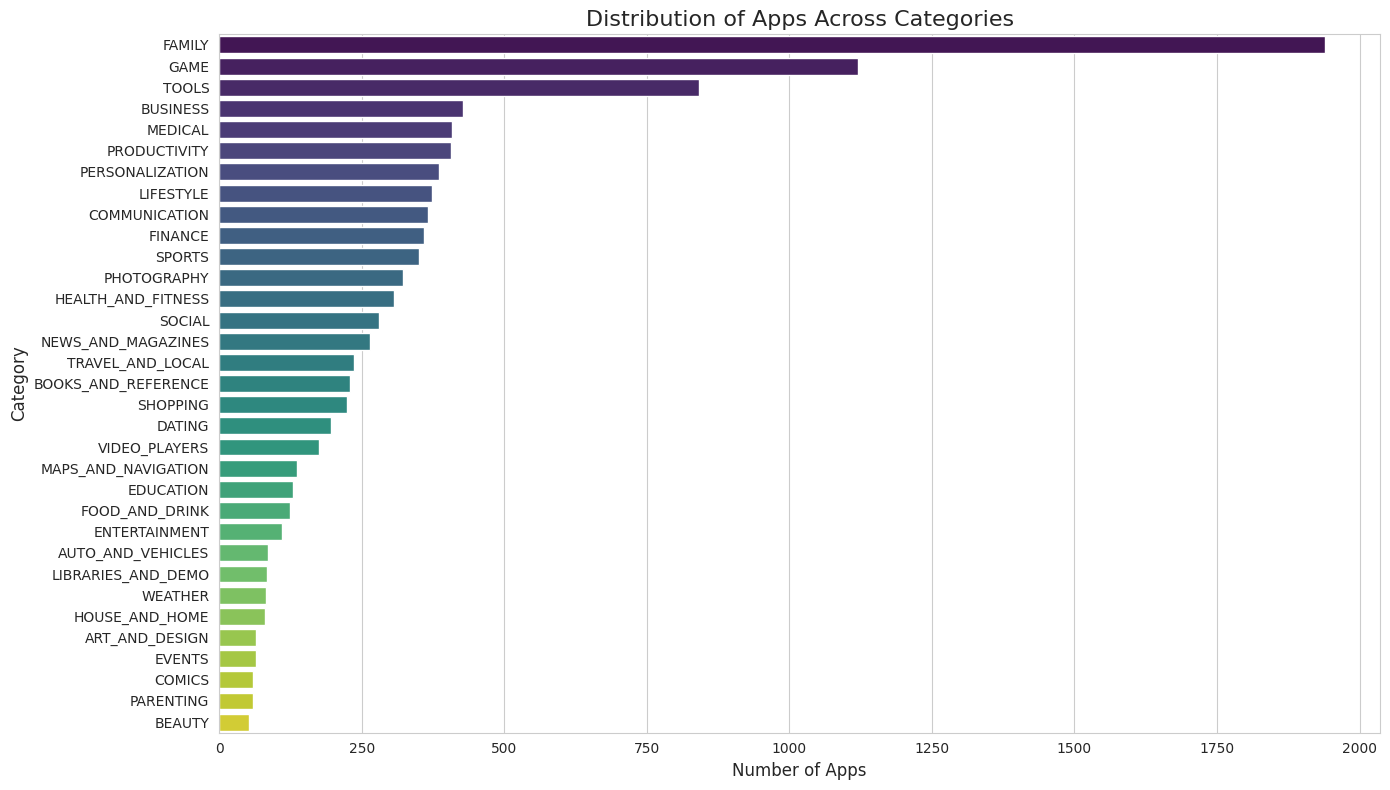

<ipython-input-4-add786ee6742>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_installed_apps.values, y=top_installed_apps.index, palette='magma')


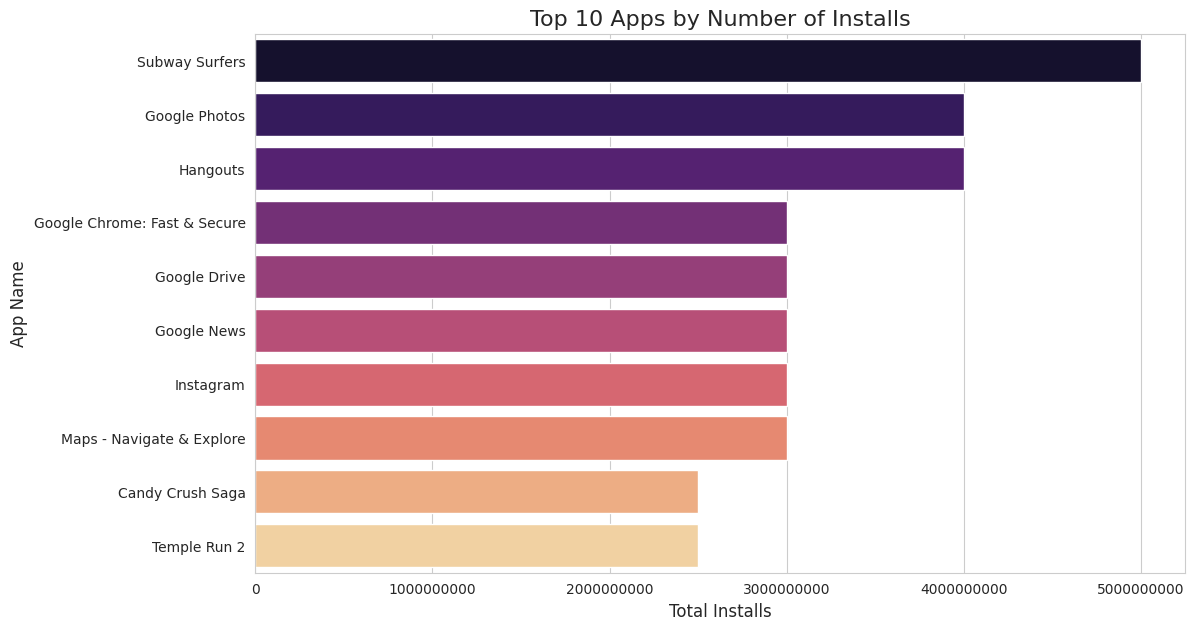

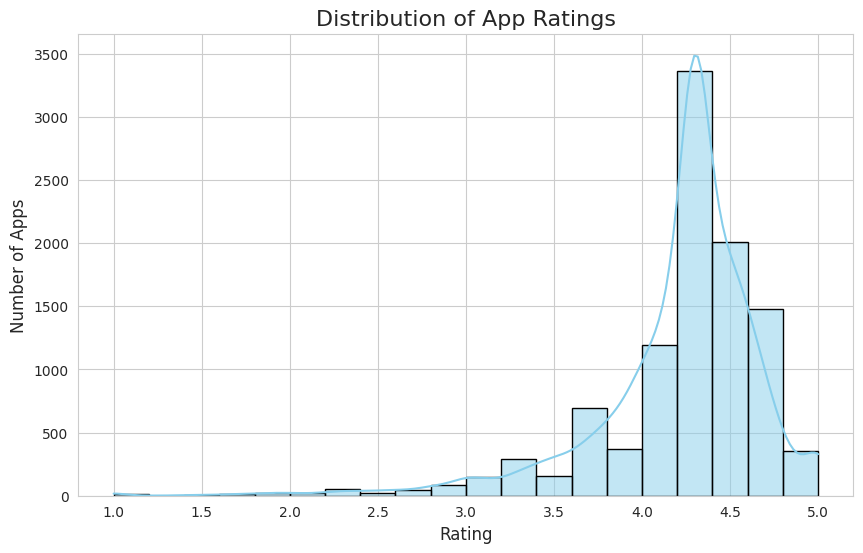

<ipython-input-4-add786ee6742>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=user_reviews_df, palette='pastel', order=['Positive', 'Neutral', 'Negative'])


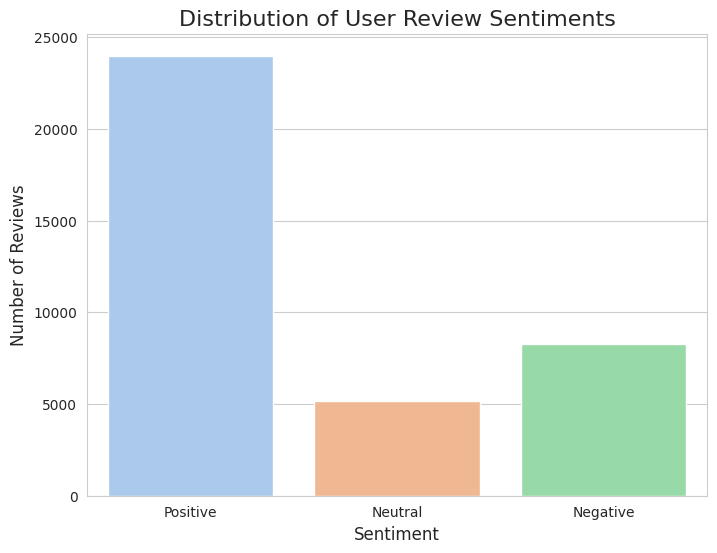

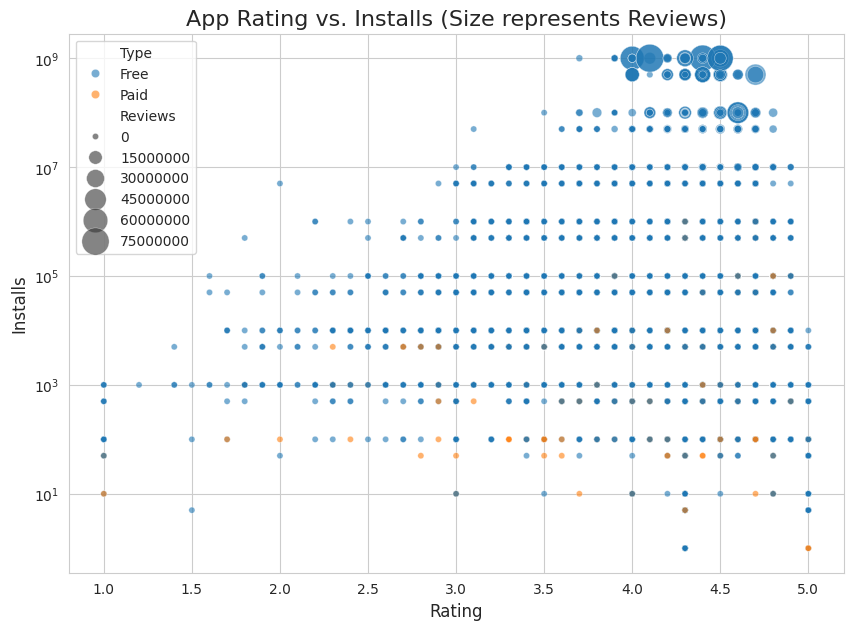

<ipython-input-4-add786ee6742>:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='coolwarm')


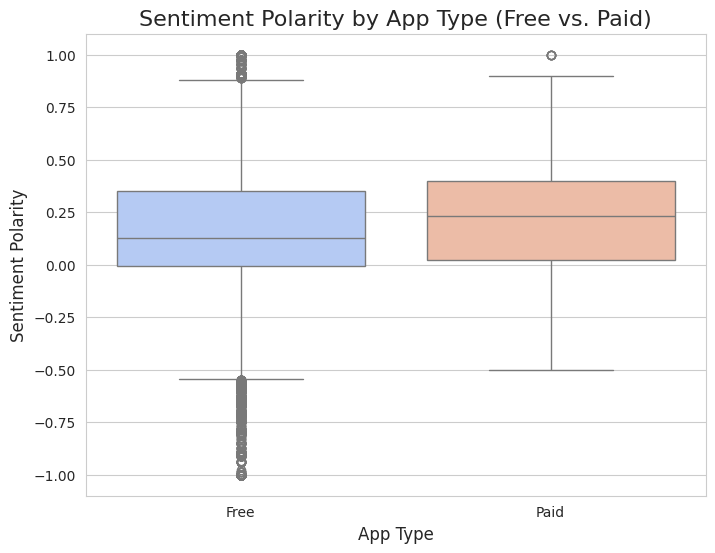

<ipython-input-4-add786ee6742>:168: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='rocket')


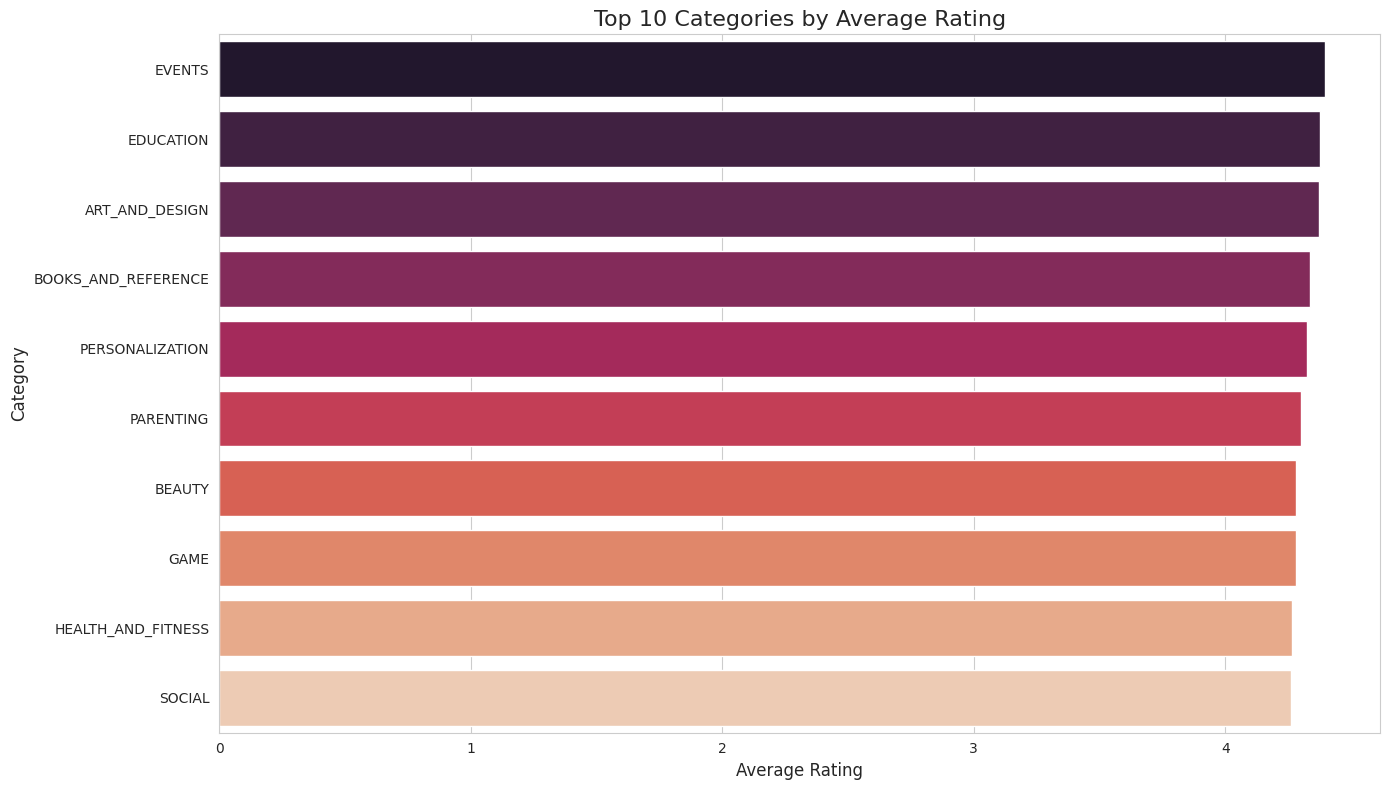

In [4]:
# -*- coding: utf-8 -*-
"""
Play Store App Analysis - Simplified and Warning-Free

This notebook explores and analyzes Play Store app data and user reviews to discover key factors
responsible for app engagement and success, with a focus on simplicity in cleaning and visualization,
and avoiding Pandas FutureWarnings.

Dataset Source: Kaggle (Play Store Apps and User Reviews)
"""

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size for clarity

# 2. Load Data
# IMPORTANT: Ensure 'Play_Store_Data.csv' and 'User_Reviews.csv'
# have been uploaded to your Colab session using 'from google.colab import files; files.upload()'
# before running this cell.
try:
    play_store_df = pd.read_csv('Play_Store_Data.csv')
    user_reviews_df = pd.read_csv('User_Reviews.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'Play_Store_Data.csv' and 'User_Reviews.csv' are in the same directory.")
    print("In Google Colab, you need to upload them using 'from google.colab import files; files.upload()'")
    # It's better to exit or raise an error if files aren't found in a real script.
    # For a notebook, you might want to stop execution here.
    exit()


# Display initial information for quick check
print("\n--- Initial Play Store Data Info ---")
print(play_store_df.info())
print("\n--- Initial User Reviews Data Info ---")
print(user_reviews_df.info())


# 3. Simplified Data Cleaning and Preprocessing - Play Store Data
print("\n--- Cleaning Play Store Data ---")

# Drop duplicates
play_store_df.drop_duplicates(inplace=True)
print(f"Duplicates removed from Play Store Data. New shape: {play_store_df.shape}")

# Handle missing 'Rating' values
play_store_df['Rating'] = pd.to_numeric(play_store_df['Rating'], errors='coerce')
play_store_df['Rating'] = play_store_df['Rating'].fillna(play_store_df['Rating'].median()) # Fixed: no inplace=True

# Convert 'Reviews' to numeric
play_store_df['Reviews'] = pd.to_numeric(play_store_df['Reviews'], errors='coerce')

# Clean 'Size' column: remove 'M', 'k', and 'Varies with device', then convert to numeric
play_store_df['Size'] = play_store_df['Size'].astype(str).str.replace('M', 'e6').str.replace('k', 'e3')
play_store_df['Size'] = play_store_df['Size'].replace('Varies with device', np.nan) # Replace specific string with NaN
play_store_df['Size'] = pd.to_numeric(play_store_df['Size'], errors='coerce')
play_store_df['Size'] = play_store_df['Size'].fillna(play_store_df['Size'].median()) # Fixed: no inplace=True

# Clean 'Installs' column: remove '+', ',', and convert to numeric
play_store_df['Installs'] = play_store_df['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)
play_store_df['Installs'] = pd.to_numeric(play_store_df['Installs'], errors='coerce')
play_store_df['Installs'] = play_store_df['Installs'].fillna(0) # Fixed: no inplace=True

# Clean 'Price' column: remove '$' and convert to numeric
play_store_df['Price'] = play_store_df['Price'].astype(str).str.replace('$', '', regex=False)
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'], errors='coerce')
play_store_df['Price'] = play_store_df['Price'].fillna(0) # Fixed: no inplace=True

# For other columns with missing values ('Type', 'Content Rating', 'Current Ver', 'Android Ver'),
# we will drop rows where they are missing as they are fewer and important for app details.
play_store_df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

print("\nPlay Store Data Info after cleaning:")
print(play_store_df.info())
print("\nMissing values in Play Store Data after cleaning:")
print(play_store_df.isnull().sum())


# 4. Simplified Data Cleaning and Preprocessing - User Reviews Data
print("\n--- Cleaning User Reviews Data ---")

# Drop rows with missing values in key sentiment columns
user_reviews_df.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

# Ensure sentiment related columns are numeric
user_reviews_df['Sentiment_Polarity'] = pd.to_numeric(user_reviews_df['Sentiment_Polarity'], errors='coerce')
user_reviews_df['Sentiment_Subjectivity'] = pd.to_numeric(user_reviews_df['Sentiment_Subjectivity'], errors='coerce')

print("\nUser Reviews Data Info after cleaning:")
print(user_reviews_df.info())
print("\nMissing values in User Reviews Data after cleaning:")
print(user_reviews_df.isnull().sum())


# 5. Merge Datasets
print("\n--- Merging Datasets ---")
# Use an inner join to keep only apps present in both datasets and have valid reviews
merged_df = pd.merge(play_store_df, user_reviews_df, on='App', how='inner')
print(f"Merged DataFrame shape: {merged_df.shape}")
print("Merged DataFrame Head:")
print(merged_df.head())


# 6. Exploratory Data Analysis (EDA) & Visualizations (Minimum 5)

# Visualization 1: Distribution of App Categories
plt.figure(figsize=(14, 8))
sns.countplot(y='Category', data=play_store_df, order=play_store_df['Category'].value_counts().index, palette='viridis')
plt.title('Distribution of Apps Across Categories', fontsize=16)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 2: Top 10 Apps by Installs
# Summing installs for apps and taking top 10
top_installed_apps = play_store_df.groupby('App')['Installs'].sum().nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_installed_apps.values, y=top_installed_apps.index, palette='magma')
plt.title('Top 10 Apps by Number of Installs', fontsize=16)
plt.xlabel('Total Installs', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.ticklabel_format(style='plain', axis='x') # Avoid scientific notation
plt.show()

# Visualization 3: Distribution of App Ratings
plt.figure(figsize=(10, 6))
sns.histplot(play_store_df['Rating'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.show()

# Visualization 4: Sentiment Distribution from User Reviews
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=user_reviews_df, palette='pastel', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of User Review Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

# Visualization 5: Relationship between Rating and Installs
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Rating', y='Installs', data=play_store_df, hue='Type', size='Reviews', sizes=(20, 400), alpha=0.6)
plt.title('App Rating vs. Installs (Size represents Reviews)', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Installs', fontsize=12)
plt.yscale('log') # Use log scale for installs to better visualize spread
plt.show()

# Additional Visualization: Average Sentiment Polarity by App Type (Free vs. Paid)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='coolwarm')
plt.title('Sentiment Polarity by App Type (Free vs. Paid)', fontsize=16)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Sentiment Polarity', fontsize=12)
plt.show()

# Additional Visualization: Top 10 Categories by Average Rating
plt.figure(figsize=(14, 8))
avg_rating_by_category = play_store_df.groupby('Category')['Rating'].mean().nlargest(10).sort_values(ascending=False)
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='rocket')
plt.title('Top 10 Categories by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()


